# Dimensions data retrieval via API

Resources:
    
- [Documentation](https://docs.dimensions.ai/dsl/)
- [API Lab](https://api-lab.dimensions.ai/)
- [API Lab (github repository)](https://github.com/digital-science/dimensions-api-lab)

This notebook will use the [dimcli library](https://github.com/digital-science/dimcli) (v.0.9.9.1) to access the Dimensions Analytics API.

Queries can be performed using:
- [Dimcli Magic Commands](https://api-lab.dimensions.ai/cookbooks/1-getting-started/4-Dimcli-magic-commands.html#Dimcli-%E2%80%98magic%E2%80%99-commands): Useful for jupyter notebooks

- Dimcli library methods, such as `.query()` and `.query_iterative()`. In this case, its possible to create variables and pass them to the query through f-strings or any other string substitution method. It's also possible to [pass lists](https://api-lab.dimensions.ai/cookbooks/1-getting-started/6-Working-with-lists.html#3.-Making-a-list-from-the-results-of-a-query) to the queries using the `json.dumps()` method from the `json` module. We'll focus on this approach for querying.

## Initial setup

In [44]:
#Importing relevant libraries
import dimcli
import json
import pandas as pd
import seaborn as sns

In [19]:
#Checking dimcli version
dimcli.__version__

'0.9.9.1'

In [20]:
#Logging in via dsl.ini file - Reference: https://api-lab.dimensions.ai/cookbooks/1-getting-started/1-Using-the-Dimcli-library-to-query-the-API.html#More-secure-method:-storing-a-private-credentials-file
dimcli.login()

Searching config file credentials for default 'live' instance..


Dimcli - Dimensions API Client (v0.9.9.1)
Connected to: <https://app.dimensions.ai/api/dsl> - DSL v2.4
Method: dsl.ini file


In [21]:
#Alternatively, to login by inputing your api key, uncomment and run the following lines:
#import getpass
#api_key = getpass.getpass("Provide your dimensions API key here: ")
#dimcli.login(key=api_key, endpoint="https://app.dimensions.ai/api/dsl")

In [22]:
#Creating the dimcli.core object (necessary for querying)
dsl = dimcli.Dsl()
type(dsl)

dimcli.core.api.Dsl

## Querying Dimensions API

### How to retrieve records?

Our objective is to retrieve all publications in Dimensions from Federal University of Rio de Janeiro (UFRJ) - grid.8536.8 - from 2010 to 2021.

In order to recover only UFRJ publications, two approaches were selected:
- Filtering queries by [GRID identifier](https://www.grid.ac/) using the field `research_orgs.id`
- Filtering queries by institution name using the field `research_org_names`

Thus, we will compare the number of records filtered by GRID to those obtained through a list of UFRJ alternative names.

In [178]:
#Getting number of results for full text query


full_text_query = dsl.query(f"""
  search publications in full_data
  for "UFRJ OR Federal University of Rio de Janeiro OR Universidade Federal do Rio de Janeiro"
  where year in {json.dumps(pubyears)}
  return year
""", verbose=False).as_dataframe()

In [179]:
full_text_query

,id,count
0,2020,51208
1,2021,45466
2,2019,44354
3,2018,44309
4,2017,37060
5,2016,32638
6,2014,30572
7,2015,28565
8,2013,25442
9,2012,22938


In [173]:
final_df = pd.DataFrame(columns=['title','org_names'])
for i in pubyears:
    partial_df = dsl.query_iterative(f"""
  search publications in full_data
  for "UFRJ OR Federal University of Rio de Janeiro OR Universidade Federal do Rio de Janeiro"
  where year = {json.dumps(i)}
  return publications[title+research_org_names]
""", verbose=False, force=True).as_dataframe()
    pd.concat([final_df, partial_df])

In [175]:
final_df

,title,org_names


Variant names (WoS) para UFRJ:

- BIOSCI DEPT EEFD UFRJ
- BL G UFRJ
- BRAZILS FED UNIV RIO DE JANEIRO
- CARLOS CHAGAS FILHO UNIV FED RIO DE JANEIRO
- CCS IB UFRJ
- CCS UFRJ
- CCS UNIV FED RIO DE JANEIRO
- COPPE FED UNIV RIO DE JANEIRO
- COPPE POLI UFRJ
- COPPE UFRJ
- COPPE UFRJ FED UNIV RIO DE JANEIRO
- COPPE UFRJ PROGRAMA ENG CIVIL
- COPPE UFRJ PROGRAMA ENGN NUCL
- COPPE UNIV FED RIO DE JANEIRO
- CT UFRJ
- CTR CIENCIAS SAUDE
- CTR CLIMA COPPE UFRJ
- CTR TECNOL
- CUCC UFRJ
- EE UNIV FED RIO DE JANEIRO
- EEAN UFRJ
- EEFD UFRJ
- EQ UFRJ
- ESCOLA QUIM UFRJ
- FAC FARM UFRJ
- FED STATE UNIV RIO DE JANEIRO
- FED UNIV HOSP RIO DE JANEIRO
- FED UNIV RIO DE JANEIRO
- FED UNIV RIO DE JANEIRO EEFD UFRJ
- FED UNIV RIO DE JANEIRO HOSP
- FED UNIV RIO DE JANEIRO IESC UFRJ
- FED UNIV RIO DE JANEIRO ILHA FUNDAO
- FED UNIV RIO DE JANEIRO IPUB
- FED UNIV RIO DE JANEIRO IPUB UFRJ
- FED UNIV RIO DE JANEIRO MOL VIROL
- FED UNIV RIO DE JANEIRO PPE COPPE UFRJ
- FED UNIV RIO DE JANEIRO REDE TB
- FED UNIV RIO DE JANEIRO UFRJ
- FED UNIV RIO DE JANERIO
- FED UNIV RIO GRANDE
- FED UNIV RIO JANEIRO
- FED UNIV RIO JANEIRO COPPE UFRJ
- FED UNIV UFRJ
- FILHO UNIV FED RIO DE JANEIRO
- FLUMINENSE FED UNIV RIO DE JANEIRO
- G UNIV FED RIO DE JANEIRO
- HOSP UNIV CLEMENTINO FRAGA FILHO HUCFF UFRJ
- HOSP UNIV CLEMENTINO FRAGA FILHO UFRJ
- HOSP UNIV FED RIO DE JANEIRO
- HUCFF UFRJ
- ICB CCS UFRJ
- ICB UFRJ
- IF UFRJ
- IFCS UFRJ
- IGEO UFRJ
- ILHA FUNDAO
- IMA UFRJ
- INJC UFRJ
- INST BIOFIS CARLOS CHAGAS FILHO UFRJ
- INST MATEMAT UFRJ
- IPPMG UFRJ
- IPUB UFRJ
- IQ UFRJ
- IVIG COPPE UFRJ
- LAB ENTOMOL MED UFRJ
- LAB INSTRUMENTACAO NUCL COPPE UFRJ
- LAB PAN RESPIRACAO IPUB UFRJ
- LABOCEANO COPPE UFRJ
- MECH ENGN PROGRAM PEM COPPE UFRJ
- MESEU NACL UFRJ
- MUS NACL UFRJ
- MUSEO NACL UFRJ
- MUSEO NACL UNIV FED RIO DE JANEIRO
- MUSEU NACIL UFRJ
- MUSEU NACIONAL UNIV FED RIO DE JANEIRO
- MUSEU NACL UFRJ
- MUSEU NACL UNIV FED RIO DE JANEIRO
- MUSEU NATL UFRJ
- NUCAT COPPE UFRJ
- NUCAT PEQ COPPE UFRJ
- OBSERV VALONGO OV UFRJ
- OBSERV VALONGO UFRJ
- PEM COPPE UFRJ
- PEMM COPPE UFRJ
- POLI UNIV FED RIO DE JANEIRO
- PPGAS MUSEU NACL UFRJ
- PPGAS UFRJ
- PPGI DCC IM UFRJ
- RIO DE JANEIRO FED UNIV
- RIO DE JANEIRO FED UNIV PUBL HLTH NUCLEUS
- UERJ CNPQ UFRJ
- UFRJ
- UFRJ CCS
- UFRJ EQ
- UFRJ FED UNIV RIO DE JANEIRO
- UFRJ ILHA DO FUNDAO
- UFRJ OBSERV VALONGO
- UFRJ UNIV FED RIO DE JANEIRO
- UNIV BRASIL UFRJ
- UNIV BRAZIL UFRJ
- UNIV FED ESTADO RIO DE JANEIRO
- UNIV FED HOSP RIO DE JANEIRO
- UNIV FED RIO DE JAMEIRO
- UNIV FED RIO DE JANEIRO
- UNIV FED RIO DE JANEIRO CCS
- UNIV FED RIO DE JANEIRO COPPE
- UNIV FED RIO DE JANEIRO COPPE EE IF
- UNIV FED RIO DE JANEIRO CP
- UNIV FED RIO DE JANEIRO E10
- UNIV FED RIO DE JANEIRO EQ UFRJ
- UNIV FED RIO DE JANEIRO HNS
- UNIV FED RIO DE JANEIRO HOSP
- UNIV FED RIO DE JANEIRO HUCFF
- UNIV FED RIO DE JANEIRO HUCFF UFRJ
- UNIV FED RIO DE JANEIRO IBCCF UFRJ
- UNIV FED RIO DE JANEIRO ILHA FUNDAO
- UNIV FED RIO DE JANEIRO IM
- UNIV FED RIO DE JANEIRO INST FIS
- UNIV FED RIO DE JANEIRO IPPMG UFRJ
- UNIV FED RIO DE JANEIRO IPUB
- UNIV FED RIO DE JANEIRO IPUB FRJ
- UNIV FED RIO DE JANEIRO IPUB UFRJ
- UNIV FED RIO DE JANEIRO POLI
- UNIV FED RIO DE JANEIRO RJ
- UNIV FED RIO DE JANEIRO UFRJ
- UNIV FED RIO DE JANEIRO UNIV BRASIL
- UNIV FED RIO DE JANERIO
- UNIV FED RIO DE JANIERO
- UNIV FED RIO DEJANEIRO
- UNIV FED RIO JANEIRO IPUB UFRJ
- UNIV FED RIO JANEIRO UFRJ
- UNIV FED RURAL RIO DE JANEIRO UFRJ
- UNIV FED STATE RIO DE JANEIRO
- UNIV FEDERAL RIO DE JANEIRO
- UNIV HOSP CLEMENTINO FRAGA FILHO UFRJ
- UNIV HOSP ESCOLA SAO FRANCISCO ASSIS HESFA UFRJ
- UNIV HOSP FED RIO DE JANEIRO
- UNIV HOSP HUCFF UFRJ
- UNIV RIO DE JANEIRO
- Federal University of Rio de Janeiro
- Universidade Federal do Rio de Janeiro
- Univ Fed Rio De Janeiro
- UFRJ

In [23]:
ufrj_wos_names = [
"BIOSCI DEPT EEFD UFRJ",
"BL G UFRJ",
"BRAZILS FED UNIV RIO DE JANEIRO",
"CARLOS CHAGAS FILHO UNIV FED RIO DE JANEIRO",
"CCS IB UFRJ",
"CCS UFRJ",
"CCS UNIV FED RIO DE JANEIRO",
"COPPE FED UNIV RIO DE JANEIRO",
"COPPE POLI UFRJ",
"COPPE UFRJ",
"COPPE UFRJ FED UNIV RIO DE JANEIRO",
"COPPE UFRJ PROGRAMA ENG CIVIL",
"COPPE UFRJ PROGRAMA ENGN NUCL",
"COPPE UNIV FED RIO DE JANEIRO",
"CT UFRJ",
"CTR CIENCIAS SAUDE",
"CTR CLIMA COPPE UFRJ",
"CTR TECNOL",
"CUCC UFRJ",
"EE UNIV FED RIO DE JANEIRO",
"EEAN UFRJ",
"EEFD UFRJ",
"EQ UFRJ",
"ESCOLA QUIM UFRJ",
"FAC FARM UFRJ",
"FED STATE UNIV RIO DE JANEIRO",
"FED UNIV HOSP RIO DE JANEIRO",
"FED UNIV RIO DE JANEIRO",
"FED UNIV RIO DE JANEIRO EEFD UFRJ",
"FED UNIV RIO DE JANEIRO HOSP",
"FED UNIV RIO DE JANEIRO IESC UFRJ",
"FED UNIV RIO DE JANEIRO ILHA FUNDAO",
"FED UNIV RIO DE JANEIRO IPUB",
"FED UNIV RIO DE JANEIRO IPUB UFRJ",
"FED UNIV RIO DE JANEIRO MOL VIROL",
"FED UNIV RIO DE JANEIRO PPE COPPE UFRJ",
"FED UNIV RIO DE JANEIRO REDE TB",
"FED UNIV RIO DE JANEIRO UFRJ",
"FED UNIV RIO DE JANERIO",
"FED UNIV RIO GRANDE",
"FED UNIV RIO JANEIRO",
"FED UNIV RIO JANEIRO COPPE UFRJ",
"FED UNIV UFRJ",
"FILHO UNIV FED RIO DE JANEIRO",
"FLUMINENSE FED UNIV RIO DE JANEIRO",
"G UNIV FED RIO DE JANEIRO",
"HOSP UNIV CLEMENTINO FRAGA FILHO HUCFF UFRJ",
"HOSP UNIV CLEMENTINO FRAGA FILHO UFRJ",
"HOSP UNIV FED RIO DE JANEIRO",
"HUCFF UFRJ",
"ICB CCS UFRJ",
"ICB UFRJ",
"IF UFRJ",
"IFCS UFRJ",
"IGEO UFRJ",
"ILHA FUNDAO",
"IMA UFRJ",
"INJC UFRJ",
"INST BIOFIS CARLOS CHAGAS FILHO UFRJ",
"INST MATEMAT UFRJ",
"IPPMG UFRJ",
"IPUB UFRJ",
"IQ UFRJ",
"IVIG COPPE UFRJ",
"LAB ENTOMOL MED UFRJ",
"LAB INSTRUMENTACAO NUCL COPPE UFRJ",
"LAB PAN RESPIRACAO IPUB UFRJ",
"LABOCEANO COPPE UFRJ",
"MECH ENGN PROGRAM PEM COPPE UFRJ",
"MESEU NACL UFRJ",
"MUS NACL UFRJ",
"MUSEO NACL UFRJ",
"MUSEO NACL UNIV FED RIO DE JANEIRO",
"MUSEU NACIL UFRJ",
"MUSEU NACIONAL UNIV FED RIO DE JANEIRO",
"MUSEU NACL UFRJ",
"MUSEU NACL UNIV FED RIO DE JANEIRO",
"MUSEU NATL UFRJ",
"NUCAT COPPE UFRJ",
"NUCAT PEQ COPPE UFRJ",
"OBSERV VALONGO OV UFRJ",
"OBSERV VALONGO UFRJ",
"PEM COPPE UFRJ",
"PEMM COPPE UFRJ",
"POLI UNIV FED RIO DE JANEIRO",
"PPGAS MUSEU NACL UFRJ",
"PPGAS UFRJ",
"PPGI DCC IM UFRJ",
"RIO DE JANEIRO FED UNIV",
"RIO DE JANEIRO FED UNIV PUBL HLTH NUCLEUS",
"UERJ CNPQ UFRJ",
"UFRJ",
"UFRJ CCS",
"UFRJ EQ",
"UFRJ FED UNIV RIO DE JANEIRO",
"UFRJ ILHA DO FUNDAO",
"UFRJ OBSERV VALONGO",
"UFRJ UNIV FED RIO DE JANEIRO",
"UNIV BRASIL UFRJ",
"UNIV BRAZIL UFRJ",
"UNIV FED ESTADO RIO DE JANEIRO",
"UNIV FED HOSP RIO DE JANEIRO",
"UNIV FED RIO DE JAMEIRO",
"UNIV FED RIO DE JANEIRO",
"UNIV FED RIO DE JANEIRO CCS",
"UNIV FED RIO DE JANEIRO COPPE",
"UNIV FED RIO DE JANEIRO COPPE EE IF",
"UNIV FED RIO DE JANEIRO CP",
"UNIV FED RIO DE JANEIRO E10",
"UNIV FED RIO DE JANEIRO EQ UFRJ",
"UNIV FED RIO DE JANEIRO HNS",
"UNIV FED RIO DE JANEIRO HOSP",
"UNIV FED RIO DE JANEIRO HUCFF",
"UNIV FED RIO DE JANEIRO HUCFF UFRJ",
"UNIV FED RIO DE JANEIRO IBCCF UFRJ",
"UNIV FED RIO DE JANEIRO ILHA FUNDAO",
"UNIV FED RIO DE JANEIRO IM",
"UNIV FED RIO DE JANEIRO INST FIS",
"UNIV FED RIO DE JANEIRO IPPMG UFRJ",
"UNIV FED RIO DE JANEIRO IPUB",
"UNIV FED RIO DE JANEIRO IPUB FRJ",
"UNIV FED RIO DE JANEIRO IPUB UFRJ",
"UNIV FED RIO DE JANEIRO POLI",
"UNIV FED RIO DE JANEIRO RJ",
"UNIV FED RIO DE JANEIRO UFRJ",
"UNIV FED RIO DE JANEIRO UNIV BRASIL",
"UNIV FED RIO DE JANERIO",
"UNIV FED RIO DE JANIERO",
"UNIV FED RIO DEJANEIRO",
"UNIV FED RIO JANEIRO IPUB UFRJ",
"UNIV FED RIO JANEIRO UFRJ",
"UNIV FED RURAL RIO DE JANEIRO UFRJ",
"UNIV FED STATE RIO DE JANEIRO",
"UNIV FEDERAL RIO DE JANEIRO",
"UNIV HOSP CLEMENTINO FRAGA FILHO UFRJ",
"UNIV HOSP ESCOLA SAO FRANCISCO ASSIS HESFA UFRJ",
"UNIV HOSP FED RIO DE JANEIRO",
"UNIV HOSP HUCFF UFRJ",
"UNIV RIO DE JANEIRO",
"Federal University of Rio de Janeiro",
"Universidade Federal do Rio de Janeiro",
"Univ Fed Rio De Janeiro",
"UFRJ"
]

In [93]:
all_case_names = []
ufrj_wos_names = [name.upper() for name in ufrj_wos_names] #Converting all elements from original list to uppercase
for i in ufrj_wos_names:
    all_case_names.append(i)
    all_case_names.append(str(i).lower())
    all_case_names.append(str(i).title())

In [94]:
len(all_case_names)

429

In [49]:
# List of UFRJ alternative names and ufrj_grid
#ufrj_names = ["COPPE", "UFRJ", "Federal University of Rio de Janeiro", "Universidade Federal do Rio de Janeiro"]
#ufrj_names = ["Universidad Federal de Rio de Janeiro", 
#              "Universite federale de Rio de Janeiro", 
#              "UFRJ", 
#              "Federal University of Rio de Janeiro", 
#              "Universidade Federal do Rio de Janeiro",
#              "COPPE"]
ufrj_grid = 'grid.8536.8'
pubyears = list(range(2010,2022)) #Range is not inclusive on the last value, hence 2022 as the second argument
print(pubyears)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [50]:
# Performing the queries
# Code adapted from https://api-lab.dimensions.ai/cookbooks/1-getting-started/6-Working-with-lists.html#3.-Making-a-list-from-the-results-of-a-query


grid_count = dsl.query(f"""
  search publications
  where research_orgs.id = {json.dumps(ufrj_grid)} and
  year in {json.dumps(pubyears)}
  return publications
  limit 1
""", verbose=False).count_total

names_count = dsl.query(f"""
  search publications
  where research_org_names in {json.dumps(ufrj_names)} and
  year in {json.dumps(pubyears)}
  return publications
  limit 1
""", verbose=False).count_total
return names_count

SyntaxError: 'return' outside function (2209143533.py, line 20)

In [62]:
# Performing the queries
# Code adapted from https://api-lab.dimensions.ai/cookbooks/1-getting-started/6-Working-with-lists.html#3.-Making-a-list-from-the-results-of-a-query


grid_count = dsl.query(f"""
  search publications
  where research_orgs.id = {json.dumps(ufrj_grid)} and
  year in {json.dumps(pubyears)}
  return publications
  limit 1
""", verbose=False).count_total

def get_names_count(names):
    names_count = dsl.query(f"""
      search publications
      where research_org_names in {json.dumps(names)} and
      year in {json.dumps(pubyears)}
      return publications
      limit 1
    """, verbose=False).count_total
    return names_count

In [ ]:
## Comparing the results
print(f"""GRID filter recovered {grid_count} records
Names filter recovered {names_count} records
Diference: {abs(grid_count - names_count)} records""")

In [58]:
def compare_two_counts(count1, count2):
    print(f"""Filter 1 recovered {count1} records
    Filter 2 recovered {count2} records
    Diference: {abs(count1 - count2)} records""")
    #return f"""Filter 1 recovered {count1} records
    #Filter 2 recovered {count2} records
    #Diference: {abs(count1 - count2)} records"""

In [59]:
ufrj_names = ["UFRJ", "Federal University of Rio de Janeiro", "Universidade Federal do Rio de Janeiro"]
ufrj_wos_names
all_case_names
ufrj_coppe = ufrj_names.copy()
ufrj_coppe.append('COPPE')

In [60]:
print(ufrj_coppe)

['UFRJ', 'Federal University of Rio de Janeiro', 'Universidade Federal do Rio de Janeiro', 'COPPE']


In [61]:
grid_df

,id,title,authors,issue,pages,type,volume,year,journal.id,journal.title
0,pub.1152802856,O MST e o Teatro: o processo de criação da peç...,"[{'affiliations': [{'city': 'Rio de Janeiro', ...",2,78-91,article,11,2021,jour.1147372,Revista aSPAs


In [ ]:
ufrj_names_counts = get_names_count(ufrj_names)
ufrj_wos_names_counts = get_names_count(ufrj_wos_names)
ufrj_coppe_counts = get_names_count(ufrj_coppe)
ufrj_allcase_counts = get_names_count(all_case_names)

In [65]:
counts = [grid_count, ufrj_names_counts, ufrj_wos_names_counts, ufrj_coppe_counts, ufrj_allcase_counts]

In [71]:
d = {'col1': ['ufrj_grid', 'ufrj_names', 'ufrj_wos_names', 'ufrj_coppe', 'ufrj_allcase'], 'col2': counts }
counts_df = pd.DataFrame(data=d)

[Text(0, 0, '55239'),
 Text(0, 0, '57590'),
 Text(0, 0, '57743'),
 Text(0, 0, '57680'),
 Text(0, 0, '57743')]

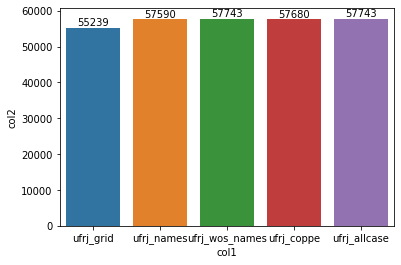

In [123]:
ax = sns.barplot(x=counts_df.col1, y = counts_df.col2)
ax.bar_label(ax.containers[0])

In [52]:
compare_two_counts(grid_count, ufrj_names_counts)

Filter 1 recovered 55239 records
    Filter 2 recovered 57590 records
    Diference: 2351 records


In [53]:
compare_two_counts(ufrj_names_counts, ufrj_wos_names_counts)

Filter 1 recovered 57590 records
    Filter 2 recovered 57743 records
    Diference: 153 records


In [63]:
compare_two_counts(ufrj_wos_names_counts, ufrj_coppe_counts)

Filter 1 recovered 57743 records
    Filter 2 recovered 57680 records
    Diference: 63 records


In [54]:
compare_two_counts(ufrj_names_counts, ufrj_coppe_counts)

Filter 1 recovered 57590 records
    Filter 2 recovered 57680 records
    Diference: 90 records


In [55]:
##Apparently, the search is case insensitive
compare_two_counts(ufrj_wos_names_counts, ufrj_allcase_counts)

Filter 1 recovered 57743 records
    Filter 2 recovered 57743 records
    Diference: 0 records


In [ ]:
compare_two_counts(ufrj_wos_names_counts, ufrj_coppe_counts)

In [56]:
#Checking up on exclusive records

In [86]:
import itertools
ab = itertools.chain(['it', 'it'], ['was'], ['annoying'])
list(set(ab))

['annoying', 'was', 'it']

In [147]:
def exclusive_records(main_query, org_names, org_id, pubyears=list(range(2010,2022)) ):
    '''The main query parameter is the list of org_names (or GRID id) for which we want to see the unique values.
    If the main query is a GRID, set the "is_id" option to True'''
    org_names_flat = [item for sublist in org_names for item in sublist]
    org_names_unique = list(set(org_names_flat))
    if main_query != org_id:
        org_names = [item for item in org_names_unique if item not in main_query]  #Removing items from the main query
        print(f"Num of positive terms: {len(main_query)}")
        print(f"Num of negative terms: {len(org_names)}")
        return  dsl.query(f"""
          search publications
          where research_org_names in {json.dumps(main_query)} and
          not research_org_names in {json.dumps(org_names)} and
          not research_orgs.id = {json.dumps(org_id)} and
          year in {json.dumps(pubyears)}
          return publications
          limit 1
        """, verbose=False).count_total 
        if len(org_names) < 20:
            print(f"Negative terms: {org_names}")
    else:
        return  dsl.query(f"""
          search publications
          where research_orgs.id = {json.dumps(main_query)} and
          not research_orgs.names in {json.dumps(org_names)} and
          year in {json.dumps(pubyears)}
          return publications
          limit 1
        """, verbose=False).count_total 

In [148]:
names = {"ufrj_names":ufrj_names, "ufrj_wos":ufrj_wos_names, "ufrj_coppe":ufrj_coppe, "ufrj_all_case":all_case_names}
names_list = [ ufrj_names, ufrj_wos_names, ufrj_coppe, all_case_names ]
org_id = ufrj_grid = 'grid.8536.8'
for i in names.keys():
    main_query = names.get(i)
    print(f"{i}:") 
    print(f"Exclusive records: {exclusive_records(main_query, names_list, org_id)}")
print(f"Unique records for {org_id}: {exclusive_records('grid.8536.8', names_list, org_id)}")

ufrj_names:
Num of positive terms: 3
Num of negative terms: 423


Login token expired. Logging in again.


Exclusive records: 0
ufrj_wos:
Num of positive terms: 143
Num of negative terms: 285
Exclusive records: 0
ufrj_coppe:
Num of positive terms: 4
Num of negative terms: 422
Exclusive records: 85
ufrj_all_case:
Num of positive terms: 429
Num of negative terms: 3
Exclusive records: 1136
1 QueryError found
1 QuerySyntaxError found

1 ParserError found
  * [Line 4:38] ('[') no viable alternative at input '[['
Unique records for grid.8536.8: None


In [132]:
names = {"ufrj_names":ufrj_names, "ufrj_wos":ufrj_wos_names, "ufrj_coppe":ufrj_coppe}
names_list = [ ufrj_names, ufrj_wos_names, ufrj_coppe, all_case_names ]
org_id = ufrj_grid = 'grid.8536.8'
for i in names.keys():
    main_query = names.get(i)
    print(f"Unique records for {i}: {exclusive_records(main_query, names_list, org_id)}")
print(f"Unique records for {org_id}: {exclusive_records(org_id, names_list, org_id)}")

KeyboardInterrupt: 

In [97]:
counts = [ufrj_names, ufrj_wos_names, ufrj_coppe, all_case_names]

In [99]:
flat_list = [item for sublist in counts for item in sublist]

In [102]:
len(flat_list)

579

In [106]:
flat_list_unique = list(set(flat_list))
#print(flat_list_unique)
len(flat_list_unique)

426

In [110]:
len([item for item in flat_list_unique if item not in all_case_names])

3

In [81]:
# The method .query_iterative was used in order to recover all exclusive records
# More on iterative querying here: https://api-lab.dimensions.ai/cookbooks/1-getting-started/1-Using-the-Dimcli-library-to-query-the-API.html#Iterative-querying-(loops)
dsl.query(f"""
  search publications
  where research_org_names in {json.dumps(ufrj_names)} and
  not research_orgs.id = {json.dumps(ufrj_grid)} and
  year in {json.dumps(pubyears)}
  return publications
  limit 1
""", verbose=False).count_total #Returns only the title and authors field of each publication. The latter field contains the affiliation data. Json format
  #return publications[title+authors]

2351

In [ ]:
pubs

In [ ]:
# The method .query_iterative was used in order to recover all exclusive records
# More on iterative querying here: https://api-lab.dimensions.ai/cookbooks/1-getting-started/1-Using-the-Dimcli-library-to-query-the-API.html#Iterative-querying-(loops)
names_df = dsl.query_iterative(f"""
  search publications
  where research_org_names in {json.dumps(ufrj_names)} and
  not research_orgs.id = {json.dumps(ufrj_grid)} and
  year in {json.dumps(pubyears)}
  return publications[basics+extras+categories+book]
""", verbose=False).as_dataframe() #Returns ALL the data

In [ ]:
# The method .query_iterative was used in order to recover all exclusive records
# More on iterative querying here: https://api-lab.dimensions.ai/cookbooks/1-getting-started/1-Using-the-Dimcli-library-to-query-the-API.html#Iterative-querying-(loops)
pubs = dsl.query_iterative(f"""
  search publications
  where research_org_names in {json.dumps(ufrj_names)} and
  not research_orgs.id = {json.dumps(ufrj_grid)} and
  year in {json.dumps(pubyears)}
  return publications[title+research_org_names]
""", verbose=False).as_dataframe() #Returns only the title and authors field of each publication. The latter field contains the affiliation data. Json format
  #return publications[title+authors]

In [ ]:
pubs.to_csv('teste.csv')
pubs
df = pd.DataFrame(pubs.research_org_names.values.tolist()).add_prefix('aff_')
#pd.DataFrame(pubs.research_org_names.values.tolist()).add_prefix('aff_').to_csv('test.csv', index=None)

In [ ]:
pubs2 = pd.merge(pubs, pd.DataFrame(pubs['research_org_names'].values.tolist()).add_prefix('aff_'), left_index=True, right_index=True)

In [ ]:
pubs3 = pubs2[pubs2.research_org_names.str.contains('COPPE')].dropna()
display(pubs3)
#pubs4 = pubs3[~pubs3.apply(lambda col: col.str.contains('UFRJ', na=False))].dropna(how='all')
#pubs4.to_csv('test.csv', index=None)

In [ ]:
def get_aff_list(authors):
    #print(authors)
    for author in authors:
        print(author)
        #test = {aff.get('raw_affiliation') for aff in author.get('affiliations')}
        #print(test)
    return True
    
def get_affiliations_df(pubs):
    for pub in pubs.get('publications'):
        title = pub.get('title') #Publication title
        #print(pub)
        #print(pub.get('title'))
        authors = pub.get('authors') #Authors of a given publication
        aff_list = get_aff_list(authors)
        return True

In [ ]:
get_affiliations_df(publications)

## Amanhã:
- [ ] Ver se os records exclusivos são todos (ou em sua maioria) da UFRJ ou se é um dado mais sujo.
- [ ] Baixar um csv direto do web app para ver se usando todos os fieldsets eu consigo mais ou menos informação.
- [ ] Adicionar os "Variant Terms" do WoS na lista de termos e ver o impacto na recuperação de registros
- [ ] Checar se minha query está recuperando de forma case insensitive